# Исследование рынка видеоигр

### Цель исследования
Выявить закономерности, определяющие успешность продажи компьютерных игр, для разработки стратегии продаж и рекламных кампаний на следующий год (у нас данные до 2016 года, мы строим прогноз на 2017-й).

### Задачи исследования
1. Выяснить, как меняются продажи игр по платформам;
2. Определить, какие платформы лидируют в глобальных продажах и сколько в среднем живет платформа;
3. Выяснить, как на продажи влияют отзывы критиков и пользователей;
4. Определить, какие жанры игр самые продаваемые;
5. Составить портрет пользователя по регионам (самые популярные платформы и жанры в регионе, влияние рейтинга ESRB на продажи);
6. На основе проведенного исследования сформулировать и проверить гипотезы.

## Обзор данных и предобработка

### Общий обзор данных, изменение типов

In [1]:
# импортируем необходимые библиотеки, отключаем предупреждения, 
# настраиваем формат вывода данных

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = 50

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('/content/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# приведем названия колонок к змеиному регистру
df.columns = df.columns.str.lower()
df.columns


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

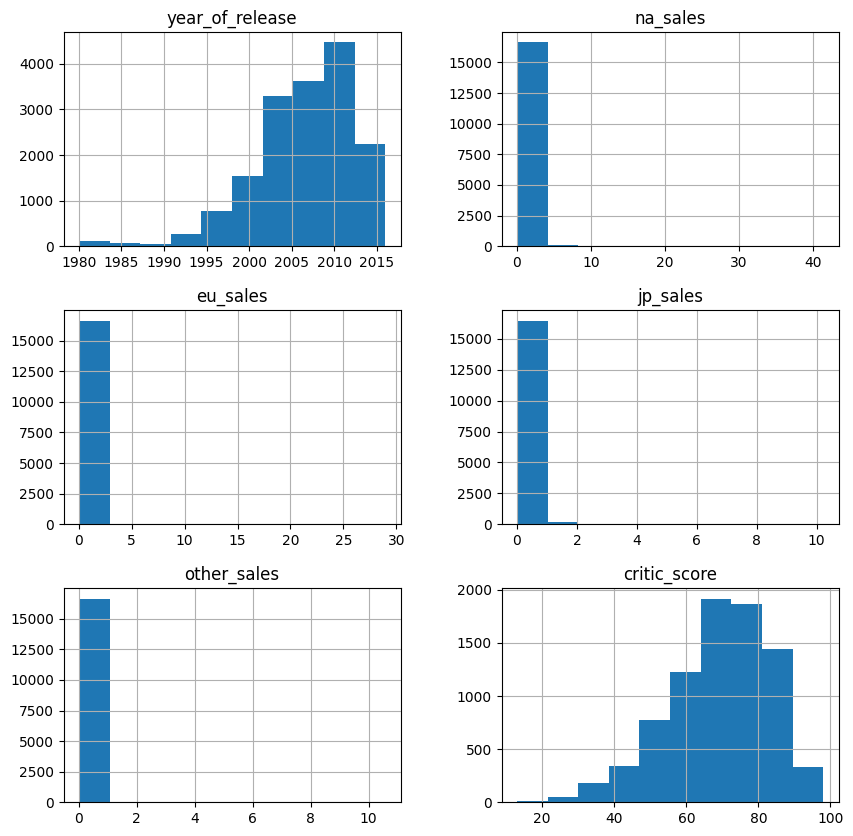

In [4]:
# посмотрим на общее распределение данных на гистограммах
df.hist(figsize=(10,10));

In [5]:
# смотрим общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Необходимо изменить типы данных в столбцах: 
- `year_of_release` — на _int_, поскольку год — это всегда целое число;
- `user_score` — на _float_, поскольку пользовательский рейтинг формируется на основании числовых оценок.

Посмотрим на уникальные значения в столбцах.

In [6]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

В столбце `year_of_release` можно будет изменить тип данных, когда мы избавимся от пропущенных значений (т. к. значение NaN нельзя преобразовать к целочисленному типу). Пока оставим тип _float_.

In [7]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В этом столбце есть пропущенные значения. Также в нем есть строковое значение tbd, поэтому на этом этапе тип данных мы менять не будем.

### Обработка пропусков

In [8]:
# сохраняем данные о количестве строк в исходном датафрейме, чтобы сравнить в дальнейшем
print(len(df))
df_raw = 16715

16715


In [9]:
# смотрим на количество и процент пропущенных значений в столбцах

pass_number = (
    df.isna().sum()
    .to_frame()
    .rename(columns = {0:'space'})
    .query('space > 0')
    .sort_values(by='space', ascending=False)    
                         
)
               
pass_share = (
    df.isna().mean()
    .to_frame()
    .rename(columns = {0:'space'})
    .query('space > 0')
    .sort_values(by='space', ascending=False)
)

display(pass_number.style.set_caption('Количество пропущенных значений') \
        .background_gradient(cmap='Blues'))
print('')
pass_share.style.set_caption('Доля пропущенных значений') \
.background_gradient(cmap='Blues')

,space
critic_score,8578
rating,6766
user_score,6701
year_of_release,269
name,2
genre,2


,space
critic_score,0.513192
rating,0.404786
user_score,0.400897
year_of_release,0.016093
name,0.000120
genre,0.000120


In [10]:
# делаем функцию для отображения пропусков на графике
sns.set_style('whitegrid')
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False
                  , fontsize = 16)
            .set_title('Пропуски в данных \n'
            , fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('Пропусков не осталось')
    

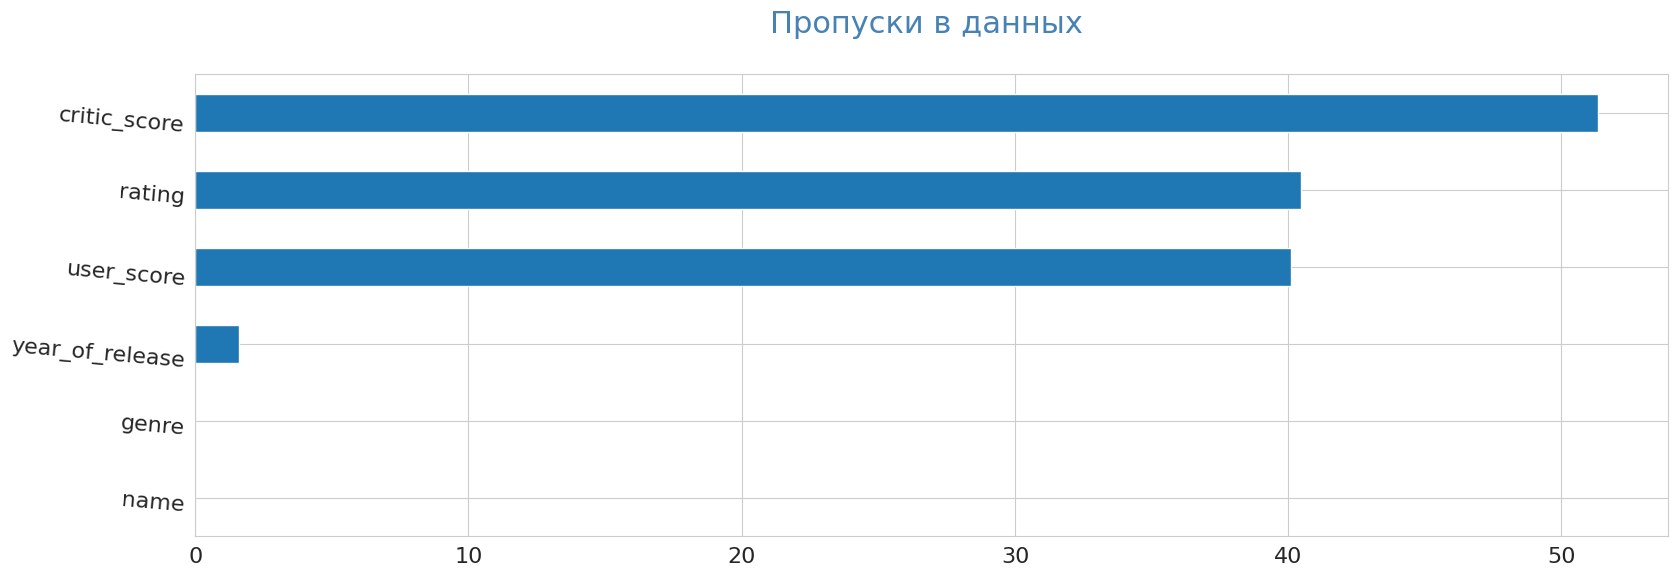

In [11]:
pass_value_barh(df)

Больше всего пропусков — в столбцах c оценкой критиков (больше половины), а также оценкой пользователей и возрастным рейтингом. Пропуски есть и в столбцах с годами выпуска игры, названием и жанром, но их не более 2%. 

Пропуски в столбцах `genre`, `name` и `year_of_release` могут быть связаны, например, с тем, что при указании названия игры на платформе эти данные не были указаны в нужных полях (например, год указан в поле с названием игры) или не были указаны вовсе. Таких пропусков в датафрейме не много (не более 2%), мы можем их удалить.

In [12]:
# избавляемся от пропущенных данных
df.dropna(subset=['year_of_release', 'name', 'genre'], inplace=True)

# и меняем тип данных в столбце с годом на целочисленный
df['year_of_release'] = df['year_of_release'].astype('int')
df['year_of_release'].dtypes

dtype('int64')

In [13]:
# посмотрим, есть ли в датафрейме явные дубликаты
df.duplicated().sum()

0

Явных дубликатов в датафрейме нет.

Три оставшихся столбца с пропусками содержат информацию о пользовательских оценках, оценках критиков и рейтинге ESRB (возрастной категории игры). 

Значение _tbd_ (To Be Determined) в столбце `user_score` может быть связано с тем, что пользовательский рейтинг вычисляется при наличии некоторого минимального количества оценок, чтобы цифры рейтинга были более адекватными: например, если у игры всего две оценки и обе 10, то рейтинг игры будет 10, тогда как у другой, более популярной игры при наличии 1000 различных пользовательских оценок рейтинг может быть значительно ниже. То есть значение _tbd_ означает, что игра не набрала достаточное количество пользовательских оценок для отображения информации о среднем пользовательском рейтинге. Эти значения можно заменить на NaN, поскольку они не несут информации о рейтинге. 

Пропуски в столбцах `user_score` и `critic_score` мы оставим, т. к. таких строк слишком много, чтобы их просто удалить, а заполнить пропуски в данном случае не представляется возможным без искажения данных.

In [14]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'].isna().sum()

8981

In [15]:
# приведем тип данных в этом столбце к float
df['user_score'] = df['user_score'].astype('float')
df['user_score'].dtypes

dtype('float64')

Пропуски в столбце `rating` могут быть связаны с тем, что рейтинг ESRB еще не присвоен (процедура присвоения рейтинга не завершена). Оставим эти пропуски.

Посмотрим, сколько строк в датафрейме мы удалили на этом этапе.

In [16]:
# исходный размер датафрейма сохранен в переменной df_raw
dropped_share = 1 - len(df)/df_raw

print('Процент удаленных строк: {:.2%}'.format(dropped_share))


Процент удаленных строк: 1.62%


### Создаем новый столбец для исследования

In [17]:
# объединим информацию о продажах игр в разных регионах в один столбец
df['world_sales'] = df[['na_sales', 'eu_sales',
                        'jp_sales', 'other_sales']].sum(axis = 1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Исследовательский анализ

### Предварительный анализ, выделение актуального периода

In [18]:
# группируем датафрейм по году выпуска игры и считаем, сколько игр 
# было выпущено в каждый из годов
df_grouped_by_year = (
    df.groupby('year_of_release')['name'].count()
    .to_frame()
    .rename(columns={'name':'games'})
)

# сортируем данные по убыванию количества выпущенных игр
(
    df_grouped_by_year.sort_values(by='games', ascending=False)
    .reset_index()
    .rename(columns={'year_of_release':'year'})
    .style
    .set_caption('Количество игр по годам \n')
    .hide_index()
    .set_table_styles
    ([dict(selector='caption', 
           props=[('background-color', 'cyan'),
                  ('text-align', 'center'),
                  ('font-weight', 'bold')])]) 
)


year,games
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775
2004,762


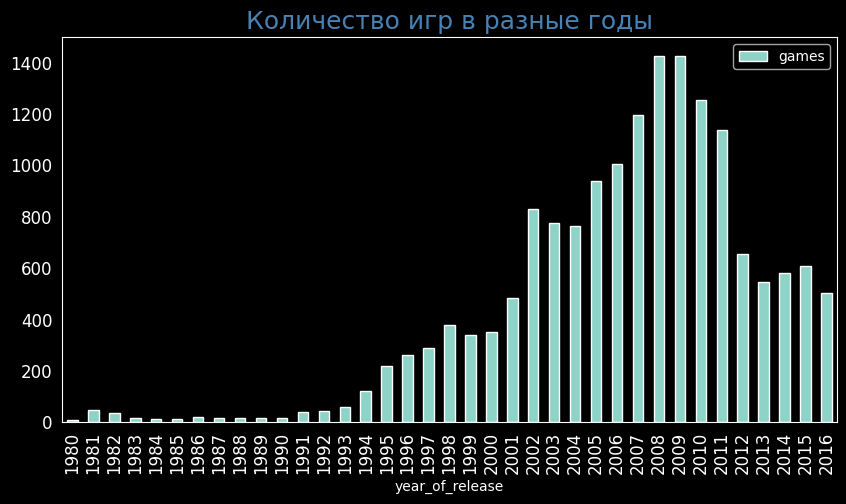

In [19]:
# посмотрим на данные о выпущенных играх на графике
plt.style.use('dark_background')
(df_grouped_by_year
 .plot(kind= 'bar', figsize=(10,5), rot = 90,
       legend = True, fontsize = 12, grid=False)
 .set_title('Количество игр в разные годы', 
            fontsize = 18, color = 'SteelBlue')
);

Мы видим, что больше всего игр производилось в 2008—2010 годах. В 2012 году наблюдается резкий спад количества проданных игр, что может быть связано с широким распространением смартфонов и социальных сетей: пользователи стали больше играть на мобильных платформах и через соцсети, чем с использованием игровых консолей.

Посмотрим, какие платформы лидируют по суммарным продажам игр.

In [20]:
# делаем сводную таблицу (группируем данные по году, платформе 
# и считаем общую сумму продаж)

pivot = (df.pivot_table
         (index='year_of_release',
          columns ='platform', 
          values='world_sales', 
          aggfunc='sum').fillna(0)
        )

# выводим топ-10 платформ по объему продаж за все годы
top_10_platforms = (pivot.sum()
                    .sort_values(ascending=False)
                    .head(10)
                    .to_frame()
                    .reset_index()
                    .rename(columns={0:'sales'})
                   )

# добавляем столбец с долей рынка по платформам
top_10_platforms['share'] = (top_10_platforms['sales'] 
                             / top_10_platforms['sales'].sum() * 100)

# настраиваем формат отображения дробных чисел и делаем заголовок таблицы
(top_10_platforms.style
 .format({'sales':'{:.1f}', 'share':'{:.1f}'})
 .set_caption('Топ-10 платформ за весь период \n')
 .hide_index()
 .set_table_styles
 ([dict(selector='caption', 
        props=[('background-color', 'cyan'),
               ('text-align', 'center'),
               ('font-weight', 'bold')])])
 )


platform,sales,share
PS2,1233.6,18.4
X360,961.2,14.3
PS3,931.3,13.9
Wii,891.2,13.3
DS,802.8,11.9
PS,727.6,10.8
PS4,314.1,4.7
GBA,312.9,4.7
PSP,289.5,4.3
3DS,257.8,3.8


В продажах за весь период, представленный в датафрейме, лидирует платформа PS2 c 18.4%. Далее идут X360 — 14.3%, PS3 — 13.9%, Wii — 13.3%, DS — 11.9%.

Построим хитмап по сводной таблице, чтобы выяснить, сколько в среднем «живет» каждая игровая платформа.

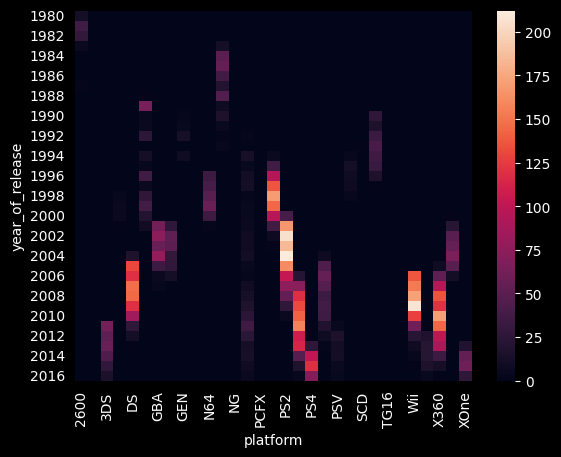

In [21]:
sns.heatmap(pivot)
sns.set(rc = {'figure.figsize':(20,15)})

На графике мы видим, что среднее время жизни популярных платфом — 5—7 лет. Будем это учитывать при исследовании. Пик продаж в среднем приходитсяна 4-й год с начала появления платформы.

### Платформы-лидеры: динамика и разброс продаж

Исходя из предшествующего анализа, мы можем выделить актуальный период, то есть те данные, которые позволят построить прогноз на 2017 год. В среднем платформа живет 5—7 лет. Судя по графику, в 2013 году заканчивают свой жизненный цикл одни популярные платформы (PS3, X360), а в 2013—2014 годах набирают популярность PS4 и XOne. Поэтому в качестве точки отсчета актуального периода возьмем 2014 год. 

In [22]:
# сохраняем данные об играх, выпущенных после 2014 года, в новый датафрейм
df_actual = df[df['year_of_release'] >= 2014]
df_actual.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


In [23]:

# выводим топ-10 платформ по объему продаж игр за актуальный период
df_actual_pivot = (df_actual
                   .pivot_table(index='year_of_release',
                                columns='platform',
                                values='world_sales',
                                aggfunc='sum')
                   .fillna(0)
                  )

top_10_actual_pivot = (df_actual_pivot.sum()
                       .sort_values(ascending=False)
                       .to_frame()[:10]
                       .reset_index()
                      )

top_10_actual_pivot.columns = ['platform', 'sales']

# добавляем столбец с долей рынка по платформам
top_10_actual_pivot['share'] = (top_10_actual_pivot['sales']
                                / top_10_actual_pivot['sales'].sum() * 100)

# настраиваем формат отображения таблицы
(top_10_actual_pivot
 .style
 .format({'sales':'{:.1f}', 'share':'{:.2f}'})
 .set_caption('Топ-10 платформ за 2014—2016 \n')
 .hide_index()
 .set_table_styles
 ([dict(selector='caption', 
        props=[('background-color', 'cyan'),
               ('text-align', 'center'),
               ('font-weight', 'bold')])])
)




platform,sales,share
PS4,288.1,39.50
XOne,140.4,19.24
3DS,86.7,11.88
PS3,68.2,9.35
X360,48.2,6.61
WiiU,43.0,5.89
PC,27.1,3.71
PSV,22.4,3.07
Wii,5.1,0.70
PSP,0.4,0.05


В данных начиная с 2014 года лидирует платформа PS4 (39.5%). На втором месте — XOne (19.24%).
Посмотрим на эти данные на графике.

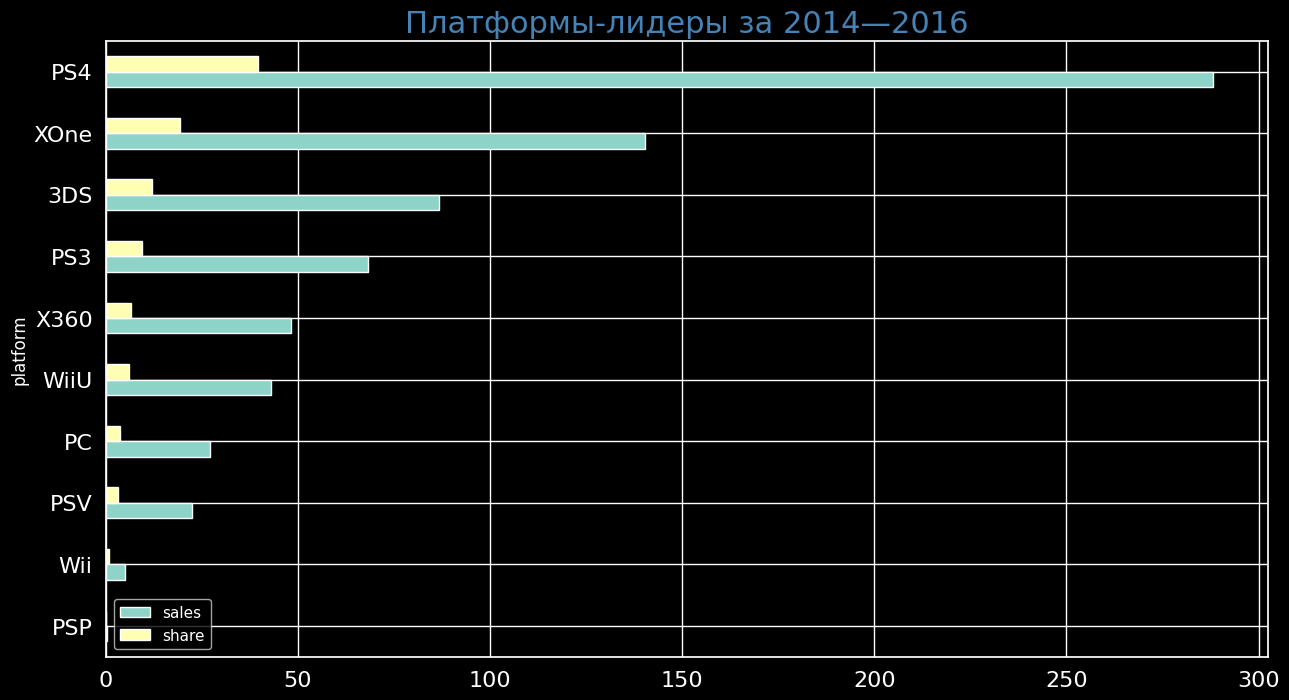

In [24]:
# строим гистограмму по платформам — лидерам продаж за период 2014—2016
plt.style.use('dark_background')
(top_10_actual_pivot
 .set_index('platform')
     .sort_values(by='sales', ascending=True)
     .plot(kind='barh', figsize=(15,8), legend=True, fontsize=16)
     .set_title('Платформы-лидеры за 2014—2016', 
                fontsize = 22, color = 'SteelBlue')
);  

Проанализируем продажи в группе лидеров по годам.

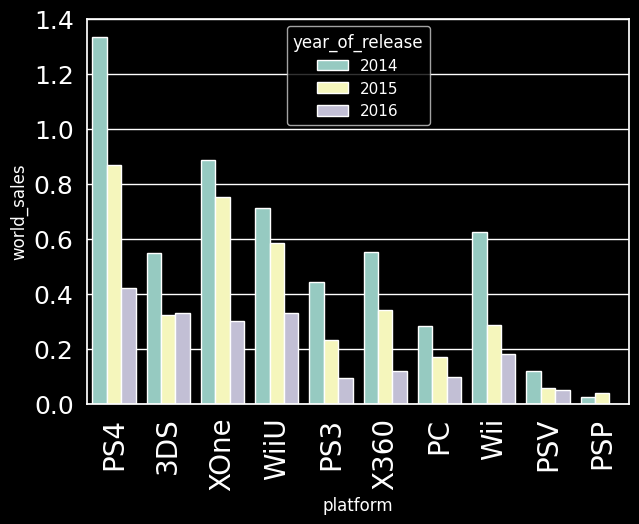

In [25]:
# формируем датафрейм с данными по платформам-лидерам
top_10_actual_pivot.reset_index(inplace=True)
df_actual_top = df_actual[df_actual['platform']
                          .isin(top_10_actual_pivot['platform'])]

# строим график с данными о продажах по платформам за 2014—2016 годы
plt.style.use('dark_background')
plt.figure(figsize=(7, 5))
sns.barplot(x='platform', y='world_sales', 
            hue='year_of_release', data=df_actual_top,
            ci=None)

plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=18)
plt.show()


**По этому графику мы можем сделать следующие наблюдения:**
1. у всех платформ-лидеров в актуальном периоде пик продаж приходится на 2014 год (начало актуального периода), далее (в 2015—2016) идет спад. Это может быть связано с ростом популярности мобильных платформ и игр в социальных сетях, которые постепенно занимают все большую часть игрового рынка. 
2. Учитывая, что данные за 2016 год не полные, а средний период жизни платформы составляет 5—7 лет, в качестве потенциально прибыльных платформ на 2017 год можно выделить PS4 и XOne.

Посмотрим, как распределены глобальные продажи игр по платформам.

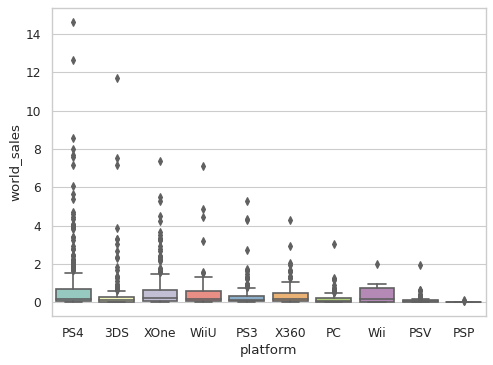

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(7,5), dpi= 80)
sns.boxplot(x='platform', y='world_sales', data=df_actual_top);


Уберем выбросы, чтобы график был более читаемым.

115
0.0681


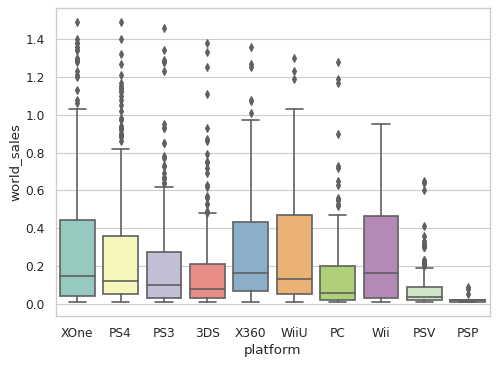

In [27]:
# записываем в датафрейм данные о продажах менее 1,5 млн
df_actual_top_mod = df_actual_top[df_actual_top['world_sales']<=1.5]

# смотрим, сколько данных осталось за пределами графика
print(len(df_actual_top) - len(df_actual_top_mod))
outlier_share = 1 - len(df_actual_top_mod)/len(df_actual_top)
print(f'{outlier_share:.4f}')

# строим боксплот по модифицированному датафрейму
plt.figure(figsize=(7, 5), dpi= 80)
sns.boxplot(x='platform', y='world_sales', data=df_actual_top_mod);


**По этому графику мы можем сделать следующие наблюдения:**
1. У платформы PS4 больше выбросов, тогда как медиана и межквартильный размах меньше, чем у XOne.
2. Платформы XOne и Wii имеют сопоставимое значение медианы, но у платформы XOne за счет большого количества выбросов суммарное значение продаж значительно выше.
3. Платформы PC и 3DS демонстрируют примерно одинаковые показатели по продажам в описываемом периоде.

### Влияние оценок пользователей и критиков на продажи

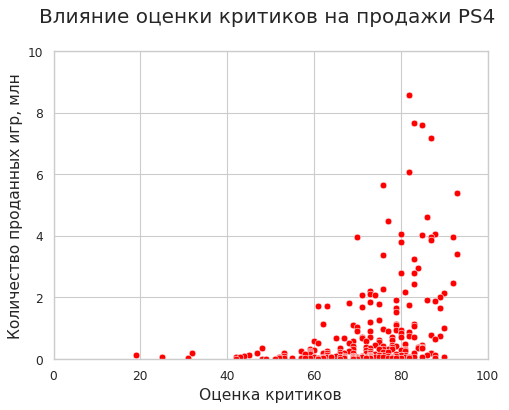

In [28]:
# записываем данные по платформе-лидеру PS3 в отдельный датафрейм
PS4 = df_actual_top[df_actual_top['platform'] == 'PS4']

# строим диаграмму рассеивания для данных о продажах и оценке критиков
plt.figure(figsize=(7, 5), dpi= 80)
g = sns.scatterplot(x='critic_score', y='world_sales', data=PS4, color='red');
g.set(ylim=(0,10))
g.set(xlim=(0,100))
g.set_xlabel('Оценка критиков', fontsize=14)
g.set_ylabel('Количество проданных игр, млн', fontsize=14);
plt.title('Влияние оценки критиков на продажи PS4 \n', fontsize=18);



На графике видно, что между оценкой критиков и количеством проданных игр есть средняя линейная зависимость. 

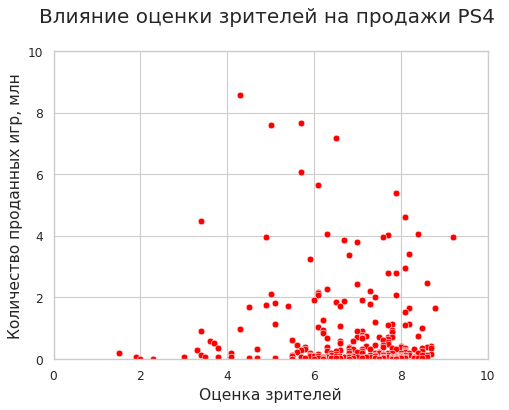

In [29]:
# строим диаграмму рассеивания для данных о продажах и оценке пользователей
plt.figure(figsize=(7, 5), dpi= 80)
g = sns.scatterplot(x='user_score', y='world_sales', data=PS4, color='red');
g.set(ylim=(0,10))
g.set(xlim=(0,10))
g.set_xlabel('Оценка зрителей', fontsize=14)
g.set_ylabel('Количество проданных игр, млн', fontsize=14);
plt.title('Влияние оценки зрителей на продажи PS4 \n', fontsize=18);



Мы видим, что между оценкой зрителей и количеством проданных игр корреляция отсутствует.

In [30]:
# строим таблицу корреляции для PS4
(
    PS4[['world_sales', 'user_score', 'critic_score']].corr()
    .style.background_gradient(cmap='Blues')
    .set_caption('Продажи PS4 и оценки критиков/пользователей \n')
    .format('{:.2f}')
)

,world_sales,user_score,critic_score
world_sales,1.00,-0.04,0.40
user_score,-0.04,1.00,0.55
critic_score,0.40,0.55,1.00


По числовым данным видно, что количество проданных игр на платформе PS4 в средней степени зависит от оценки критиков и не зависит от оценки пользователей. Посмотрим на те же данные по всем остальным платформам за актуальный период.

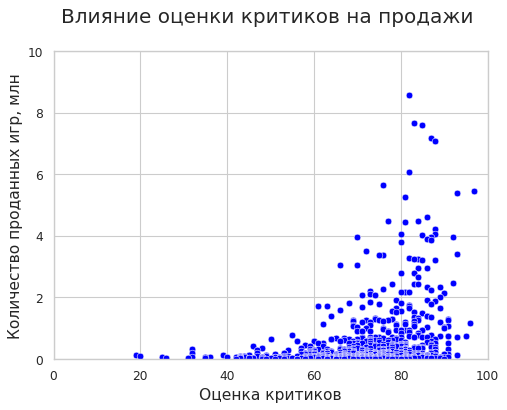

In [31]:
# оценка критиков (влияние на продажи)
plt.figure(figsize=(7, 5), dpi=80)
g = sns.scatterplot(x='critic_score', y='world_sales', data=df_actual_top, 
                    color='blue');
g.set(ylim=(0,10))
g.set(xlim=(0,100))
g.set_xlabel('Оценка критиков', fontsize=14)
g.set_ylabel('Количество проданных игр, млн', fontsize=14);
plt.title('Влияние оценки критиков на продажи \n', fontsize=18);



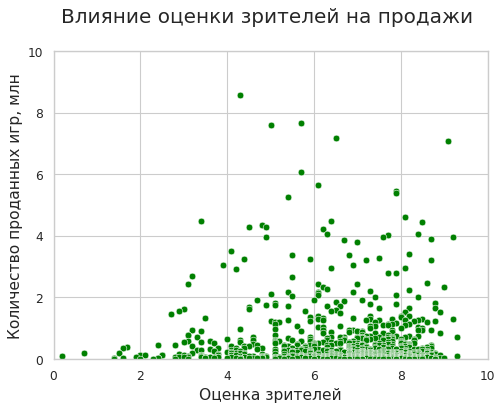

In [32]:
# оценка пользователей (влияние на продажи)
plt.figure(figsize=(7, 5), dpi= 80)
g = sns.scatterplot(x='user_score', y='world_sales', data=df_actual_top, 
                    color='green');
g.set(ylim=(0,10))
g.set(xlim=(0,10))
g.set_xlabel('Оценка зрителей', fontsize=14)
g.set_ylabel('Количество проданных игр, млн', fontsize=14);
plt.title('Влияние оценки зрителей на продажи \n', fontsize=18);

In [33]:
# строим таблицу корреляции по всем платформам
(
    df_actual_top[['world_sales', 'user_score', 'critic_score']].corr()
    .style.background_gradient(cmap='Blues')
    .set_caption('Продажи игр и оценки критиков/пользователей \n')
    .format('{:.2f}')
)

,world_sales,user_score,critic_score
world_sales,1.00,-0.01,0.33
user_score,-0.01,1.00,0.50
critic_score,0.33,0.50,1.00


Здесь также прослеживается среднее влияние оценки критиков на количество проданных игр и отсутствие корреляции между оценкой пользователей и продажами. 

### Распределение проданных игр по жанрам в мире

In [34]:
sns.set_style('whitegrid')

In [35]:

# строим сводную таблицу по данным о продажах игр разных жанров
df_genre = (df.groupby('genre')['world_sales']
            .median().sort_values(ascending=False)
            .reset_index()
           )


# настраиваем формат отображения таблицы
(df_genre.style            
 .set_caption('Распределение проданных игр по жанрам в мире \n')
 .hide_index()
 .format({'world_sales':'{:.1f}', 'share':'{:.2f}'})
 .set_table_styles
 ([dict(selector='caption', 
        props=[('background-color', 'cyan'),
               ('text-align', 'center'),
               ('font-weight', 'bold')])])
)
 


genre,world_sales
Platform,0.3
Shooter,0.2
Sports,0.2
Fighting,0.2
Action,0.2
Racing,0.2
Role-Playing,0.2
Misc,0.2
Simulation,0.2
Puzzle,0.1


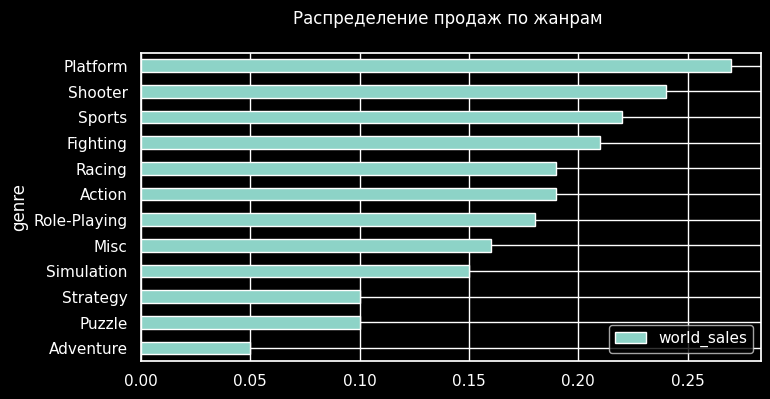

In [36]:
plt.style.use('dark_background')
# строим график по данным о продажах игр разных жанров
(df_genre
 .set_index('genre')
 .sort_values(by='world_sales', ascending=True)
 .plot(kind='barh', title='Распределение продаж по жанрам \n',
       figsize=(8,4), legend=True)
);

В мировых продажах игры жанров Platform, Shooter и Sports. На последнем месте за актуальный период — жанр Adventure.

### Промежуточный вывод

1. Актуальным периодом по нашим данным мы будем считать период с 2014 по 2016 год, это обусловлено полученными данными о среднем времени жизни игровой платформы (5—7 лет) и динамичностью исследуемой индустрии.
2. В актуальном периоде лидирует платформа PS4.
3. Потенциально прибыльные платфомы на 2017 год — PS4 и XOne.
4. Между количеством проданных игр и оценкой критиков наблюдается средняя корреляция. Оценки пользователей не влияют на продажи.
5. В мировых продажах (по медиане) лидируют игры жанров Platform, Shooter и Sports. На последнем месте за актуальный период — жанр Adventure. 

### Портреты пользователей по регионам


Изучим три параметра:
1. Лидирующие жанры игр (будем оценивать по медиане)
2. Лидирующие платформы
3. Влияние рейтинга ESRB на продажи в регионе

#### Северная Америка

In [37]:
sns.set_style('whitegrid')

In [38]:
# группируем данные о продажах в Северной Америке по жанрам
na_genre = (df_actual.groupby('genre')['na_sales']
            .median().sort_values(ascending=False)
            .to_frame()[:5]
            .reset_index()
           )
 
# настраиваем формат отображения таблицы
(na_genre.style.set_caption('Топ-5 жанров в Северной Америке \n')
 .set_table_styles
 ([dict(selector='caption', 
        props=[('background-color', 'cyan'),
               ('text-align', 'center'),
               ('font-weight', 'bold')])])
 .hide_index()
 .format({'na_sales':'{:.1f}', 'share':'{:.2f}'})
)

genre,na_sales
Shooter,0.2
Platform,0.1
Sports,0.1
Fighting,0.0
Racing,0.0


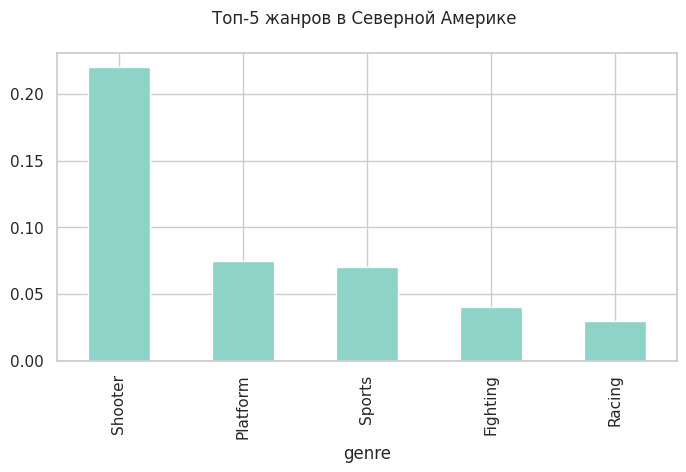

In [39]:
# строим гистограмму по сгруппированным данным
(df_actual.groupby('genre')['na_sales']
 .median()
 .sort_values(ascending=False)[:5]
 .plot(kind='bar',
       title='Топ-5 жанров в Северной Америке \n',
       figsize=(8,4))
);

В Северной Америке лидирует жанр Shooter. На втором месте — Platform, на третьем — Sports.

In [40]:
# группируем данные о продажах в Северной Америке по платформам
na_platform = (df_actual.groupby('platform')['na_sales']
               .sum().sort_values(ascending=False)
               .to_frame()[:5]
               .reset_index()
              )

# добавляем столбец с долей рынка по платформам
na_platform['share'] = (na_platform['na_sales']
                        / na_platform['na_sales'].sum()
                        *100)

# настраиваем формат отображения таблицы
(na_platform.style.set_caption('Топ-5 платформ в Северной Америке \n')
 .hide_index()
 .set_table_styles
 ([dict(selector='caption', 
        props=[('background-color', 'cyan'),
               ('text-align', 'center'),
               ('font-weight', 'bold')])])
 .format({'na_sales':'{:.1f}', 'share':'{:.2f}'})
)

platform,na_sales,share
PS4,98.6,39.00
XOne,81.3,32.14
X360,28.3,11.19
3DS,22.6,8.95
PS3,22.1,8.72


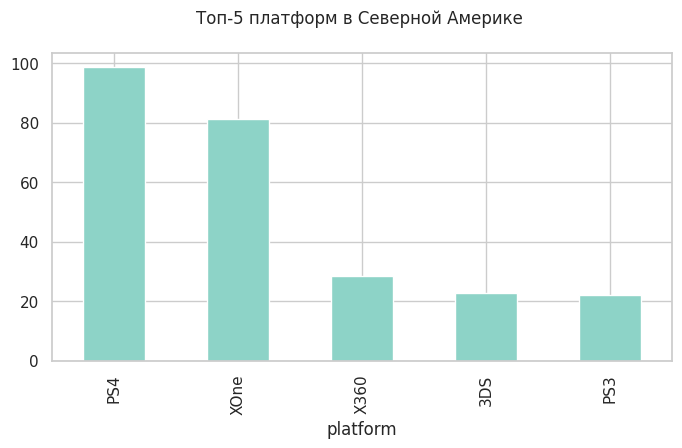

In [41]:
# строим гистограмму по сгруппированным данным
(df_actual.groupby('platform')['na_sales']
 .sum()
 .sort_values(ascending=False)[:5]
 .plot(kind='bar',
       title='Топ-5 платформ в Северной Америке \n',
       figsize=(8,4))
);

В Северной Америке лидирует платформа PS4, на втором месте — XOne, остальные сильно отстают. Пятерка платформ-лидеров совпадает с мировой. Вероятно, это связано с тем, что Америка является «законодателем мод» в этой сфере, а американский рынок — наиболее масштабный из мировых.

#### Европа

In [42]:
# группируем данные о продажах в Европе по жанрам
eu_genre = (df_actual.groupby('genre')['eu_sales']
               .median().sort_values(ascending=False)
               .to_frame()[:5]
               .reset_index()
              )

# настраиваем формат отображения таблицы
(eu_genre.style.set_caption('Топ-5 жанров в Европе \n')
 .hide_index()
 .set_table_styles
 ([dict(selector='caption', 
        props=[('background-color', 'cyan'),
               ('text-align', 'center'),
               ('font-weight', 'bold')])])
 .format({'eu_sales':'{:.1f}', 'share':'{:.2f}'})
)

genre,eu_sales
Shooter,0.2
Platform,0.1
Racing,0.1
Sports,0.1
Simulation,0.0


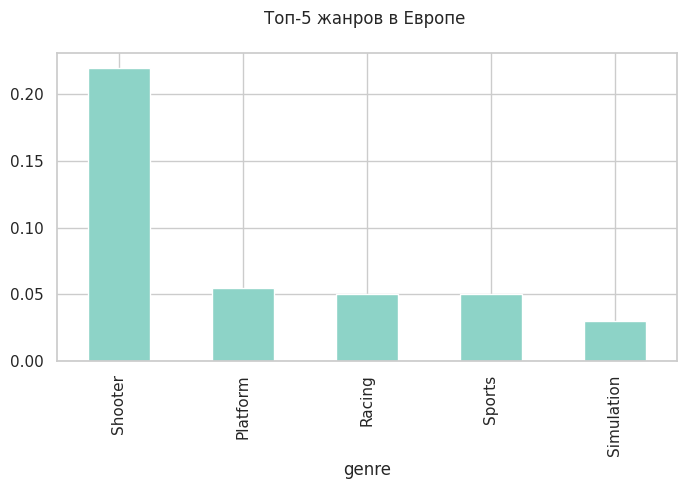

In [43]:
# строим гистограмму по сгруппированным данным
(df_actual.groupby('genre')['eu_sales']
 .median()
 .sort_values(ascending=False)[:5]
 .plot(kind='bar',
       title='Топ-5 жанров в Европе \n',
       figsize=(8,4))
);

На первом месте в Европе, как и в США, — Shooter, затем Platform.

In [44]:
# группируем данные о продажах в Европе по платформам
eu_platform = (df_actual.groupby('platform')['eu_sales']
               .sum().sort_values(ascending=False)
               .to_frame()[:5]
               .reset_index()
              )

# добавляем столбец с долей рынка по платформам
eu_platform['share'] = (eu_platform['eu_sales']
                        / eu_platform['eu_sales'].sum()
                        *100)

# настраиваем формат отображения таблицы
(eu_platform.style.set_caption('Топ-5 платформ в Европе \n')
 .hide_index()
 .set_table_styles
 ([dict(selector='caption', 
        props=[('background-color', 'cyan'),
               ('text-align', 'center'),
               ('font-weight', 'bold')])])
 .format({'eu_sales':'{:.1f}', 'share':'{:.2f}'})
)

platform,eu_sales,share
PS4,130.0,55.12
XOne,46.2,19.60
PS3,25.5,10.83
PC,18.0,7.62
3DS,16.1,6.83


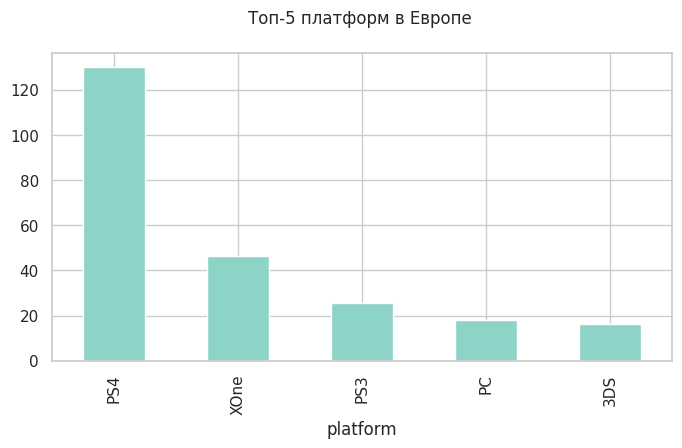

In [45]:
# строим гистограмму по сгруппированным данным
(df_actual.groupby('platform')['eu_sales']
 .sum()
 .sort_values(ascending=False)[:5]
 .plot(kind='bar',
       title='Топ-5 платформ в Европе \n',
       figsize=(8,4))
);

В Европе, как и в мире и в США, лидирует PS4, а XOne находится на втором месте.

#### Япония

In [46]:
# группируем данные о продажах в Японии по жанрам
jp_genre = (df_actual.groupby('genre')['jp_sales']
               .median().sort_values(ascending=False)
               .to_frame()[:5]
               .reset_index()
              )

# настраиваем формат отображения таблицы
(jp_genre.style.set_caption('Топ-5 жанров в Японии \n')
 .hide_index()
 .set_table_styles
 ([dict(selector='caption', 
        props=[('background-color', 'cyan'),
               ('text-align', 'center'),
               ('font-weight', 'bold')])])
 .format({'jp_sales':'{:.1f}', 'share':'{:.2f}'})
)

genre,jp_sales
Role-Playing,0.1
Fighting,0.0
Puzzle,0.0
Action,0.0
Adventure,0.0


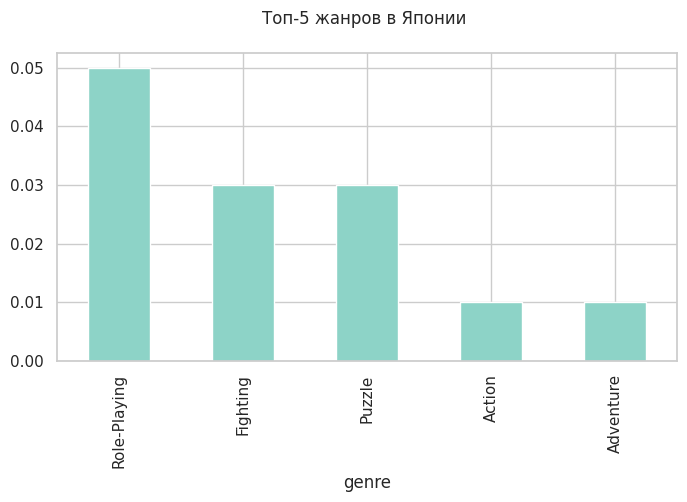

In [47]:
# строим гистограмму по сгруппированным данным
(df_actual.groupby('genre')['jp_sales']
 .median()
 .sort_values(ascending=False)[:5]
 .plot(kind='bar',
       title='Топ-5 жанров в Японии \n',
       figsize=(8,4))
);

В Японии с большим отрывом лидирует жанр Role-Playing, Fighting и Puzzle делят второе место, а Shooter и Platform, входящие в тройку продаж в мире, Америке и Европе, не входят в Японии в топ-5.

In [48]:
# группируем данные о продажах в Японии по платформам
jp_platform = (df_actual.groupby('platform')['jp_sales']
               .sum().sort_values(ascending=False)
               .to_frame()[:5]
               .reset_index()
              )

# добавляем столбец с долей рынка по платформам
jp_platform['share'] = (jp_platform['jp_sales']
                        / jp_platform['jp_sales'].sum()
                        *100)

# настраиваем формат отображения таблицы
(jp_platform.style.set_caption('Топ-5 платформ в Японии \n')
 .hide_index()
 .set_table_styles
 ([dict(selector='caption', 
        props=[('background-color', 'cyan'),
               ('text-align', 'center'),
               ('font-weight', 'bold')])])
 .format({'jp_sales':'{:.1f}', 'share':'{:.2f}'})
)

platform,jp_sales,share
3DS,44.2,47.92
PS4,15.0,16.27
PSV,14.5,15.75
PS3,11.2,12.15
WiiU,7.3,7.92


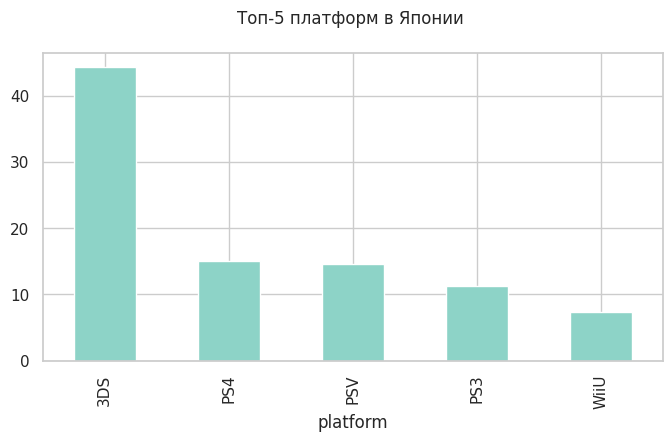

In [49]:
# строим гистограмму по сгруппированным данным
(df_actual.groupby('platform')['jp_sales']
 .sum()
 .sort_values(ascending=False)[:5]
 .plot(kind='bar', 
       title='Топ-5 платформ в Японии \n',
       figsize=(8,4))
);

В Японии лидирует платформа 3DS, которой не было среди лидеров в других регионах и в мире. Платформа PS4 занимает с большим отрывом второе место. Вероятно, лидерство платформы 3DS (Nintendo) связано с тем, что она производится в Японии.

#### Другие регионы


In [50]:
# группируем данные о продажах в других регионах по жанрам
other_genre = (df_actual.groupby('genre')['other_sales']
                  .median().sort_values(ascending=False)
                  .to_frame()[:5]
                  .reset_index()
                 )

# настраиваем формат отображения таблицы
(other_genre.style.set_caption('Топ-5 жанров в других регионах \n')
 .hide_index()
 .set_table_styles
 ([dict(selector='caption', 
        props=[('background-color', 'cyan'),
               ('text-align', 'center'),
               ('font-weight', 'bold')])])
 .format({'other_sales':'{:.1f}', 'share':'{:.2f}'})
)

genre,other_sales
Shooter,0.1
Platform,0.0
Sports,0.0
Action,0.0
Fighting,0.0


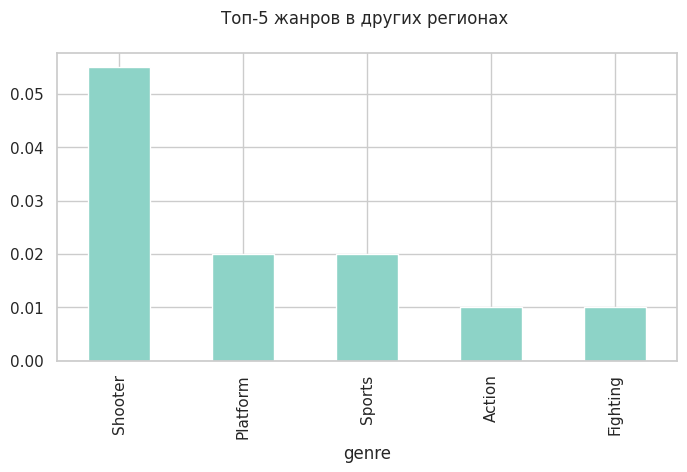

In [51]:
# строим гистограмму по сгруппированным данным
(df_actual.groupby('genre')['other_sales']
 .median()
 .sort_values(ascending=False)[:5]
 .plot(kind='bar',
       title='Топ-5 жанров в других регионах \n',
       figsize=(8,4))
);

На первом месте в других регионах — Shooter, на втором — Platform.

In [52]:
# группируем данные о продажах в других регионах по платформам
other_platform = (df_actual.groupby('platform')['other_sales']
                  .sum().sort_values(ascending=False)
                  .to_frame()[:5]
                  .reset_index()
                 )

# добавляем столбец с долей рынка по платформам
other_platform['share'] = (other_platform['other_sales']
                        / other_platform['other_sales'].sum()
                        *100)

# настраиваем формат отображения таблицы
(other_platform.style.set_caption('Топ-5 платформ в других регионах \n')
 .hide_index()
 .set_table_styles
 ([dict(selector='caption', 
        props=[('background-color', 'cyan'),
               ('text-align', 'center'),
               ('font-weight', 'bold')])])
 .format({'other_sales':'{:.1f}', 'share':'{:.2f}'})
)

platform,other_sales,share
PS4,44.5,59.78
XOne,12.5,16.83
PS3,9.4,12.59
X360,4.3,5.85
3DS,3.7,4.95


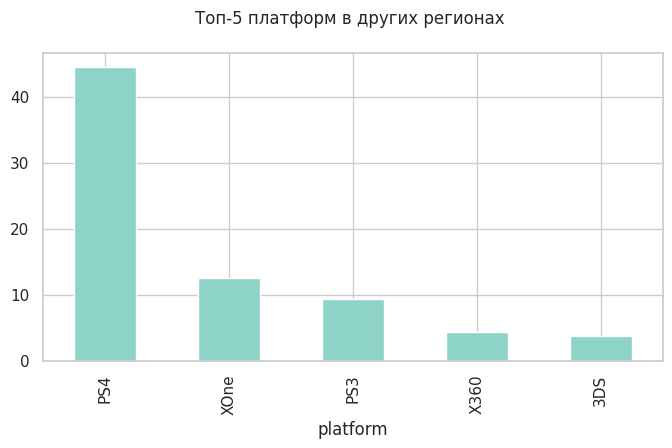

In [53]:
# строим гистограмму по сгруппированным данным
(df_actual.groupby('platform')['other_sales']
 .sum()
 .sort_values(ascending=False)[:5]
 .plot(kind='bar', 
       title='Топ-5 платформ в других регионах \n',
       figsize=(8,4))
);

Здесь также лидирует платформа PS4, XOne с большим отрывом — на втором месте.

#### Сводные данные по всем регионам (жанры и платформы)

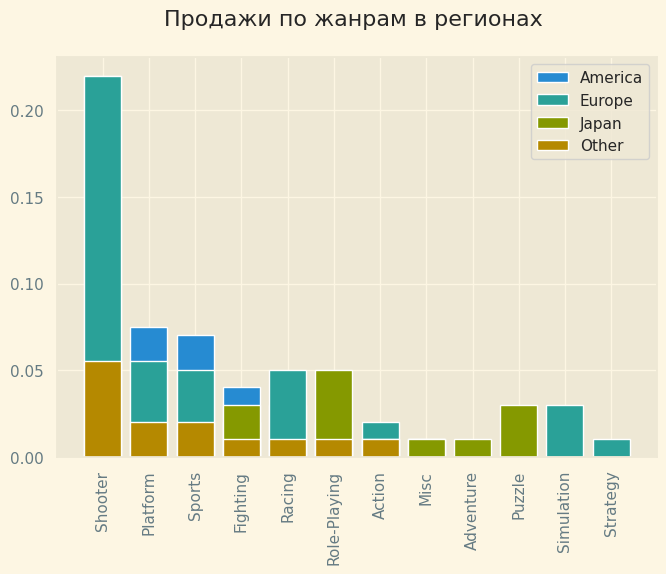

In [54]:
# строим сводную таблицу по жанрам в разбивке по регионам
pivot_g = (df_actual.pivot_table
             (index='genre',
              values = ('na_sales', 'eu_sales', 'jp_sales', 'other_sales'),
              aggfunc = 'median').reset_index()
              .sort_values(by='na_sales', ascending=False)
)

# строим гистограмму по сгруппированным данным
plt.style.use('Solarize_Light2')
fig=plt.figure(figsize=(2,1))
ax=fig.add_axes([0,0,3,4])
ax.bar(pivot_g['genre'], pivot_g['na_sales'])
ax.bar(pivot_g['genre'], pivot_g['eu_sales'])
ax.bar(pivot_g['genre'], pivot_g['jp_sales'])
ax.bar(pivot_g['genre'], pivot_g['other_sales'])
ax.legend(labels=['America', 'Europe', 'Japan', 'Other'])
ax.set_title('Продажи по жанрам в регионах \n')
plt.xticks(rotation=90)
plt.show()



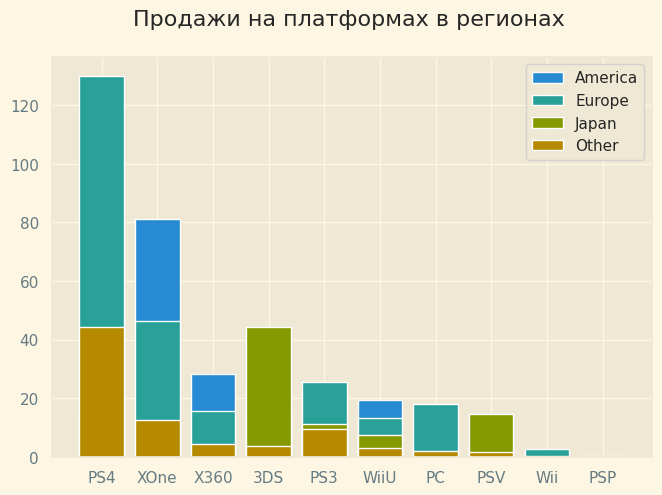

In [55]:
# делаем то же самое для платформ, группируем данные
pivot_pl = (df_actual.pivot_table
             (index='platform',
              values = ('na_sales', 'eu_sales', 'jp_sales', 'other_sales'),
              aggfunc = 'sum').reset_index()
              .sort_values(by='na_sales', ascending=False)
)

# строим гистограмму

fig=plt.figure(figsize=(2,1))
ax=fig.add_axes([0,0,3,4])
ax.bar(pivot_pl['platform'], pivot_pl['na_sales'])
ax.bar(pivot_pl['platform'], pivot_pl['eu_sales'])
ax.bar(pivot_pl['platform'], pivot_pl['jp_sales'])
ax.bar(pivot_pl['platform'], pivot_pl['other_sales'])
ax.legend(labels=['America', 'Europe', 'Japan', 'Other'])
ax.set_title('Продажи на платформах в регионах \n')

plt.show()



#### Промежуточный вывод

Было установлено, что в регионах есть некоторые различия в преобладающих жанрах и платформах:

**1. Северная Америка**
- _Топ-5 платформ:_
    - PS4 (39%); 
    - XOne (32.14%); 
    - X360 (11.2%); 
    - 3DS (9%);
    - PS3 (8.7%).
    
- _Топ-5 жанров:_
    - Shooter;
    - Platform;
    - Sports;
    - Fighting;
    - Racing.

**2. Европа**
- _Топ-5 платформ:_ 
    - PS4 (55%);
    - XOne (19.6%);
    - PS3 (10.8%);
    - PC (7.6%);
    - 3DS (6.8%).
    
- _Топ-5 жанров:_
    - Shooter;
    - Platform;
    - Racing;
    - Sports;
    - Simulation.

**3. Япония**
- _Топ-5 платформ:_
    - 3DS (48%);
    - PS4 (16.3%);
    - PSV (15.8%);
    - PS3 (12%);
    - WiiU (8%).
    
- _Топ-5 жанров:_
    - Role-Playing;
    - Fighting;
    - Puzzle;
    - Action;
    - Adventure.

**4. Другие регионы**
- _Топ-5 платформ:_

    - PS4 (60%);
    - XOne (17%);
    - PS3 (13%);
    - X360 (6%);
    - 3DS (5%).
    
- _Топ-5 жанров:_
     
   - Shooter;
   - Platform;
   - Sports;
   - Action;
   - Fighting.

#### Влияние рейтинга ESRB на продажи игр в разных регионах

Данные в столбце `rating` означают следующее:

`EC`	— Для детей младшего возраста (от 3 лет).

`E`	— Подходит для всех возрастных категорий. 

`E 10+` — Подходит для лиц старше 10 лет. 

`T` — Подходит для лиц старше 13 лет. 

`M` — Подходит для лиц старше 17 лет. 

`AO` — Подходит для взрослых старше 18 лет. 

`RP` — Категория ещё не присвоена.

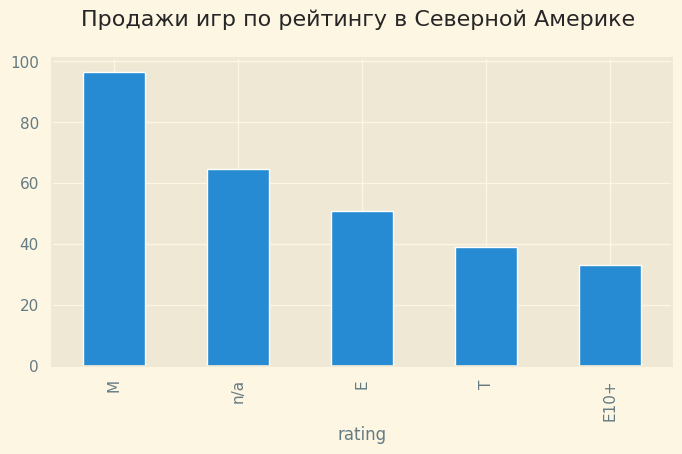

In [56]:
# заполняем пропуски в данных о рейтинге строковым значением,
# чтобы они отображались в сводной таблице и на графике
df_actual['rating'].fillna('n/a', inplace=True)

# делаем сводную таблицу и гистограмму по рейтингу в Северной Америке
(df_actual.groupby('rating')['na_sales']
 .sum()
 .sort_values(ascending=False)
 .plot(kind='bar', 
       title='Продажи игр по рейтингу в Северной Америке \n',
       figsize=(8,4))
);


In [57]:
# посмотрим на те же данные в таблице
na_rat = (df_actual.groupby('rating')['na_sales']
          .sum()
          .to_frame()
          .sort_values(by='na_sales', ascending=False)
          .reset_index()
         )

# добавим столбец с долей проданных игр в каждом рейтинге
# от общего числа продаж в регионе
na_rat['share'] = na_rat['na_sales'] / na_rat['na_sales'].sum() * 100

# настраиваем формат отображения таблицы
(na_rat.style
 .set_caption('Продажи игр по возрастному рейтингу в Северной Америке \n')
 .hide_index()
 .set_table_styles
 ([dict(selector='caption', 
        props=[('background-color', 'cyan'),
               ('text-align', 'center'),
               ('font-weight', 'bold')])])
 .format({'na_sales':'{:.1f}', 'share':'{:.2f}'})
)


rating,na_sales,share
M,96.4,33.94
n/a,64.7,22.78
E,50.7,17.86
T,39.0,13.71
E10+,33.2,11.70


В продажах по Северной Америке лидируют игры с рейтингами `М` (подходит для лиц старше 17 лет) — 34% — и `Е` (подходит для всех возрастных категорий) — 18%. Далее по количеству проданных копий идут игры с рейтингом `T` (для лиц старше 13 лет) — 13.7%, `E10+` (для лиц старше 10 лет) — 11.7%. Игр с пропущенным значением в колонке `rating` — 22.8%. Игры двух категорий — `ЕС` (для детей младшего возраста) и `RP` (рейтинг еще не присвоен) — в продажах по Северной Америке отсутствуют.

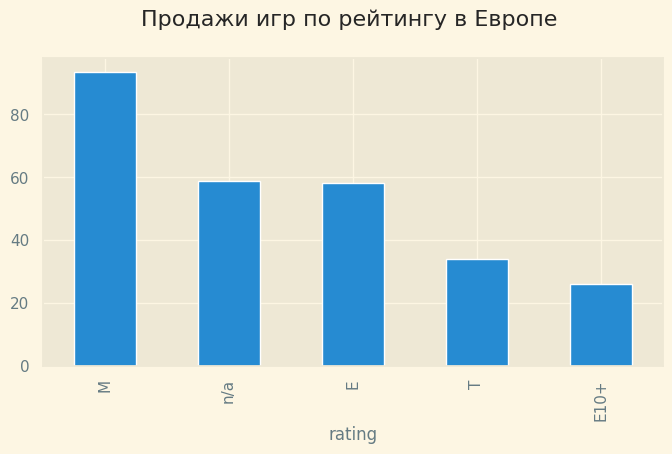

In [58]:
# делаем сводную таблицу и гистограмму по рейтингу в Европе

(df_actual.groupby('rating')['eu_sales']
 .sum()
 .sort_values(ascending=False)
 .plot(kind='bar', 
       title='Продажи игр по рейтингу в Европе \n',
       figsize=(8,4))
);


In [59]:
# посмотрим на те же данные в таблице
eu_rat = (df_actual.groupby('rating')['eu_sales']
          .sum()
          .to_frame()
          .sort_values(by='eu_sales', ascending=False)
          .reset_index()
         )

# добавим столбец с долей проданных игр в каждом рейтинге
# от общего числа продаж в регионе
eu_rat['share'] = eu_rat['eu_sales'] / eu_rat['eu_sales'].sum() * 100

# настраиваем формат отображения таблицы
(eu_rat.style
 .set_caption('Продажи игр по возрастному рейтингу в Европе \n')
 .hide_index()
 .set_table_styles
 ([dict(selector='caption', 
        props=[('background-color', 'cyan'),
               ('text-align', 'center'),
               ('font-weight', 'bold')])])
 .format({'eu_sales':'{:.1f}', 'share':'{:.2f}'})
)


rating,eu_sales,share
M,93.4,34.52
n/a,59.0,21.78
E,58.1,21.45
T,34.1,12.59
E10+,26.2,9.66


В Европе лидируют по продажам игры с рейтингом `М` (около 35%) и `Е` (около 21.5%), далее идут игры категорий `Т` (12.6%) и `E10+` (около 10%). Так же, как и в Америке, в продажах отсутствуют игры категорий `RP` и `EC`. Игр с пропущенным значением в столбце с возрастным рейтингом — около 22%.

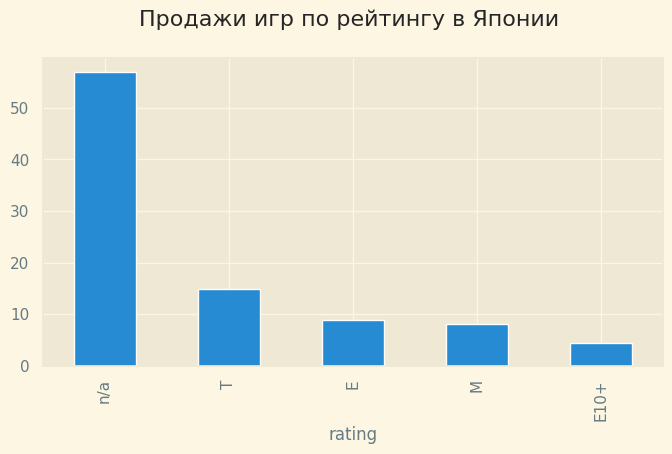

In [60]:
# делаем сводную таблицу и гистограмму по рейтингу в Японии

(df_actual.groupby('rating')['jp_sales']
 .sum()
 .sort_values(ascending=False)
 .plot(kind='bar', 
       title='Продажи игр по рейтингу в Японии \n',
       figsize=(8,4))
);


In [61]:
# посмотрим на те же данные в таблице
jp_rat = (df_actual.groupby('rating')['jp_sales']
          .sum()
          .to_frame()
          .sort_values(by='jp_sales', ascending=False)
          .reset_index()
         )

# добавим столбец с долей проданных игр в каждом рейтинге
# от общего числа продаж в регионе
jp_rat['share'] = jp_rat['jp_sales'] / jp_rat['jp_sales'].sum() * 100

# настраиваем формат отображения таблицы
(jp_rat.style
 .set_caption('Продажи игр по возрастному рейтингу в Японии \n')
 .hide_index()
 .set_table_styles
 ([dict(selector='caption', 
        props=[('background-color', 'cyan'),
               ('text-align', 'center'),
               ('font-weight', 'bold')])])
 .format({'jp_sales':'{:.1f}', 'share':'{:.2f}'})
)


rating,jp_sales,share
n/a,56.9,61.12
T,14.8,15.88
E,8.9,9.60
M,8.0,8.60
E10+,4.5,4.79


Больше чем в 60% игр в Японии пропущены данные о рейтинге. Так же, как и в Европе и Америке, отсутствуют в продажах игры с рейтингом `EC` и `RP`. Доля игр с рейтингом `Т` — около 16%, с рейтингом `Е` — 9.6%, с рейтингом `М` — 8.6%. 

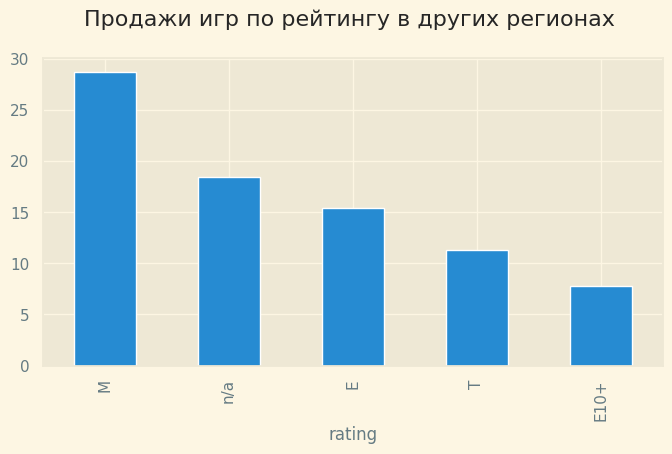

In [62]:
# делаем сводную таблицу и гистограмму по рейтингу в других регионах

(df_actual.groupby('rating')['other_sales']
 .sum()
 .sort_values(ascending=False)
 .plot(kind='bar', 
       title='Продажи игр по рейтингу в других регионах \n',
       figsize=(8,4))
);


In [63]:
# посмотрим на те же данные в таблице
other_rat = (df_actual.groupby('rating')['other_sales']
          .sum()
          .to_frame()
          .sort_values(by='other_sales', ascending=False)
          .reset_index()
         )

# добавим столбец с долей проданных игр в каждом рейтинге
# от общего числа продаж в регионе
other_rat['share'] = other_rat['other_sales'] / other_rat['other_sales'].sum() * 100

# настраиваем формат отображения таблицы
(other_rat.style
 .set_caption('Продажи игр по возрастному рейтингу в других регионах \n')
 .hide_index()
 .set_table_styles
 ([dict(selector='caption', 
        props=[('background-color', 'cyan'),
               ('text-align', 'center'),
               ('font-weight', 'bold')])])
 .format({'other_sales':'{:.1f}', 'share':'{:.2f}'})
)


rating,other_sales,share
M,28.7,35.13
n/a,18.4,22.54
E,15.4,18.86
T,11.3,13.88
E10+,7.8,9.59


В остальных регионах лидируют игры с рейтингом `М` — 35%, у рейтинга `Е` — 19%, у рейтинга `Т` — около 14%, продажи игр с рейтингом `ЕС` и `RP` отсутствуют. Поскольку игры с рейтингом `RP` и `EC` отсутствуют во всех регионах, посмотрим, сколько вообще игр с таким рейтингом в нашем датафрейме за актуальный период.

In [64]:
display(df_actual[df_actual['rating'] == 'RP'])
df_actual[df_actual['rating'] == 'EC']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales


Как видим, игр с такими рейтингами (`ЕС` и `RP`) в нашей таблице нет, возможно, это связано с тем, что в столбце с возрастным рейтингом много пропущенных значений, либо с другими факторами.

#### Сводные данные по всем регионам (возрастной рейтинг)

Объединим данные о продажах игр в разных регионах в зависимости от рейтинга в одну гистограмму.

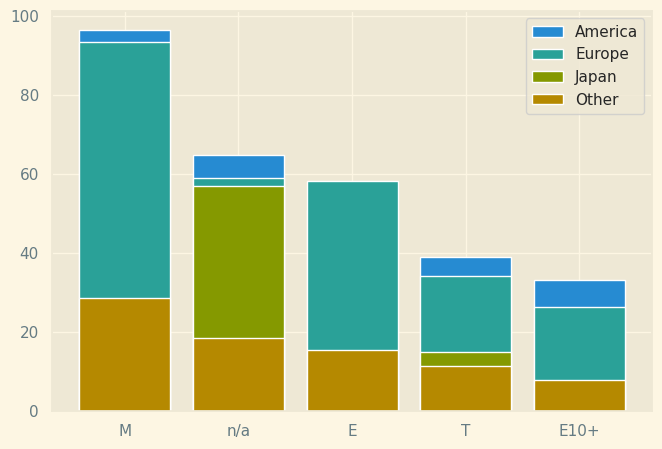

In [65]:
pivot_rat = (df_actual.pivot_table
             (index='rating',
              values = ('na_sales', 'eu_sales', 'jp_sales', 'other_sales'),
              aggfunc = 'sum').reset_index()
              .sort_values(by='na_sales', ascending=False)
)
pivot_rat

plt.style.use('Solarize_Light2')
fig=plt.figure(figsize=(2,1))
ax=fig.add_axes([0,0,3,4])
ax.bar(pivot_rat['rating'], pivot_rat['na_sales'])
ax.bar(pivot_rat['rating'], pivot_rat['eu_sales'])
ax.bar(pivot_rat['rating'], pivot_rat['jp_sales'])
ax.bar(pivot_rat['rating'], pivot_rat['other_sales'])
ax.legend(labels=['America', 'Europe', 'Japan', 'Other'])

plt.show()



#### Промежуточный вывод

В Японии, в отличие от всех остальных регионов, большая часть (более 60%) игр не имеют рейтинга, то есть в этом регионе на продажи не влияет североамериканский рейтинг ESRB. В наибольшей степени влияние рейтинга на продажи наблюдается в Европе.

## Проверка гипотез

### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные.

Мы исходим из предположения о том, что обе выборки распределены примерно одинаково, поэтому параметр equal_var установим равным True.


In [66]:
x_one = df_actual[df_actual['platform'] == 'XOne']
xscore = x_one['user_score'].fillna(0)

pc = df_actual[df_actual['platform'] == 'PC']
pcscore = pc['user_score'].fillna(0)

alpha = .05

print('Нулевая гипотеза:')
print('Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.')
print('')
print('Альтернативная гипотеза:')
print('Средние пользовательские рейтинги платформ Xbox One и PC разные.')
print('')

res = st.ttest_ind(xscore, pcscore, equal_var=True)
print(res.pvalue)

if res.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не получилось отвергнуть нулевую гипотезу')


Нулевая гипотеза:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза:
Средние пользовательские рейтинги платформ Xbox One и PC разные.

0.32800030965842586
Не получилось отвергнуть нулевую гипотезу


В результате проведенного статистического теста нулевую гипотезу отвергнуть не удалось, то есть мы не располагаем данными, которые бы опровергли нулевую гипотезу. Следовательно, мы будем считать, что средние пользовательские рейтинги Xbox One и PC одинаковые.

### Гипотеза: Средние пользовательские рейтинги жанров Action и Sport одинаковые

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sport одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sport разные.

Мы исходим из предположения о том, что обе выборки распределены примерно одинаково, поэтому параметр equal_var установим равным True.


In [67]:
action = df_actual[df_actual['genre'] == 'Action']
act_score = action['user_score'].fillna(0)

sport = df_actual[df_actual['genre'] == 'Sports']
sp_score = sport['user_score'].fillna(0)

alpha = .05

print('Нулевая гипотеза:')
print('Средние пользовательские рейтинги жанров Action и Sport одинаковые.')
print('')
print('Альтернативная гипотеза:')
print('Средние пользовательские рейтинги жанров Action и Sport разные.')
print('')

res = st.ttest_ind(act_score, sp_score, equal_var=True)
print(res.pvalue)

if res.pvalue < alpha: 
  print('Отвергаем нулевую гипотезу')
else:
  print('Не получилось отвергнуть нулевую гипотезу')


Нулевая гипотеза:
Средние пользовательские рейтинги жанров Action и Sport одинаковые.

Альтернативная гипотеза:
Средние пользовательские рейтинги жанров Action и Sport разные.

0.003247568418715718
Отвергаем нулевую гипотезу


В результате проведенного статистического теста нулевую гипотезу удалось отвергнуть, то есть мы не располагаем данными, которые бы подтвердили нулевую гипотезу. Следовательно, мы будем считать, что средние пользовательские рейтинги жанров Action и Sport разные.

## Общий вывод

1. Среднее время жизни игровой консоли составляет 5—7 лет.
2. Потенциально прибыльные платформы на 2017 год — PS4 и XOne.
3. В актуальном периоде (2014—2016) лидирует платформа PS4.
4. Количество проданных игр в средней степени зависит от оценки критиков и не зависит от оценки пользователей.
5. В мировых продажах (по медиане) лидируют игры жанров Platform, Shooter и Sports. На последнем месте за актуальный период — жанр Adventure. 
6. Продажи игр в Европе и Северной Америке в основном совпадают с мировыми тенденциями (по преобладающим жанрам и платформам), этот рынок самый обширный, он задает тренды в мире.
7. Возрастной рейтинг ESRB не влияет на продажи в Японии, больше 60% игр в Японии не имеют этого рейтинга. В наибольшей степени влияние рейтинга на продажи наблюдается в Европе.
8. Проверка гипотез статистическими методами показала, что средние пользовательские рейтинги жанров Action и Sport разные, а платформ Xbox One и PC — одинаковые.